In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('events.csv')

In [4]:
df.iloc[0]

data    {"event": "user", "timestamp": 1629034566.4657...
Name: 0, dtype: object

In [5]:
df.iloc[0]['data']

'{"event": "user", "timestamp": 1629034566.465764, "text": "Can you give me dosage information of Acetaminophen?", "parse_data": {"intent": {"id": 7090382799137562595, "name": "dosage_drug", "confidence": 0.9982604384422302}, "entities": [{"entity": "lab", "start": 38, "end": 51, "confidence_entity": 0.917961061000824, "value": "Acetaminophen", "extractor": "DIETClassifier"}, {"entity": "drug", "start": 38, "end": 51, "value": "Acetaminophen", "extractor": "RegexEntityExtractor"}], "text": "Can you give me dosage information of Acetaminophen?", "message_id": "7d8959488b874f40ace7448c16a0e949", "metadata": {}, "intent_ranking": [{"id": 7090382799137562595, "name": "dosage_drug", "confidence": 0.9982604384422302}, {"id": 405427049427078584, "name": "during_lab", "confidence": 0.0006751163164153695}, {"id": -9083428087091897059, "name": "need_lab", "confidence": 0.00023692214745096862}, {"id": -6156321711181753568, "name": "warnings_drug", "confidence": 0.00020338113245088607}, {"id": 321

In [6]:
import json

In [7]:
json_acceptable_string = df.iloc[0]['data'].replace("'", "\"")

In [8]:
dictionary = json.loads(json_acceptable_string)

In [9]:
dictionary.keys()

dict_keys(['event', 'timestamp', 'text', 'parse_data', 'input_channel', 'message_id', 'metadata'])

In [10]:
dictionary['event']

'user'

In [11]:
dictionary['timestamp']

1629034566.465764

In [12]:
dictionary['text']

'Can you give me dosage information of Acetaminophen?'

In [13]:
dictionary['input_channel']

'rest'

In [14]:
dictionary['parse_data'].keys()

dict_keys(['intent', 'entities', 'text', 'message_id', 'metadata', 'intent_ranking', 'response_selector'])

In [15]:
dictionary['parse_data']['intent']

{'id': 7090382799137562595,
 'name': 'dosage_drug',
 'confidence': 0.9982604384422302}

In [16]:
dictionary['parse_data']['intent_ranking']

[{'id': 7090382799137562595,
  'name': 'dosage_drug',
  'confidence': 0.9982604384422302},
 {'id': 405427049427078584,
  'name': 'during_lab',
  'confidence': 0.0006751163164153695},
 {'id': -9083428087091897059,
  'name': 'need_lab',
  'confidence': 0.00023692214745096862},
 {'id': -6156321711181753568,
  'name': 'warnings_drug',
  'confidence': 0.00020338113245088607},
 {'id': 3219210177683846726,
  'name': 'any_detail_lab',
  'confidence': 0.00019598257495090365},
 {'id': -642408458165806388,
  'name': 'inform_lab',
  'confidence': 9.751486504683271e-05},
 {'id': -8698956650135219269,
  'name': 'detail_lab',
  'confidence': 9.193476580549031e-05},
 {'id': -7717581020534048741,
  'name': 'usage_lab',
  'confidence': 8.928767056204379e-05},
 {'id': 606063139889531774,
  'name': 'prepare_lab',
  'confidence': 7.776697748340666e-05},
 {'id': -2526813778595393808,
  'name': 'risk_lab',
  'confidence': 7.16398426447995e-05}]

In [17]:
dictionary['parse_data']['intent_ranking'][0]['confidence']

0.9982604384422302

In [18]:
confidences = [intent['confidence'] for intent in dictionary['parse_data']['intent_ranking']]

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.hist(confidences, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data');

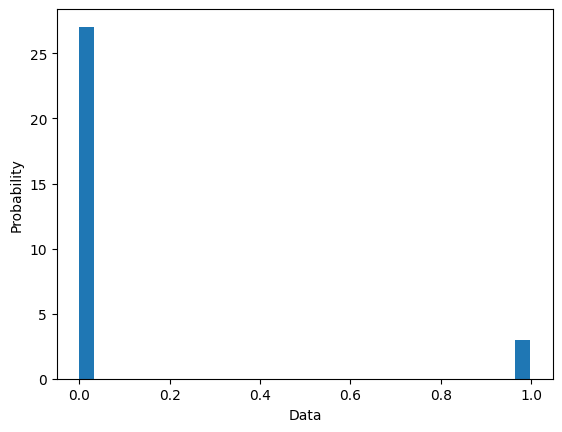

In [21]:
plt.show()

In [22]:
le = len(df)
le

101

In [23]:
all_confidence = []

for i in range(le):
    json_acceptable_string = df.iloc[i]['data'].replace("'", "\"")
    dictionary = json.loads(json_acceptable_string)
    confidences = [intent['confidence'] for intent in dictionary['parse_data']['intent_ranking']]
    all_confidence.append(confidences)

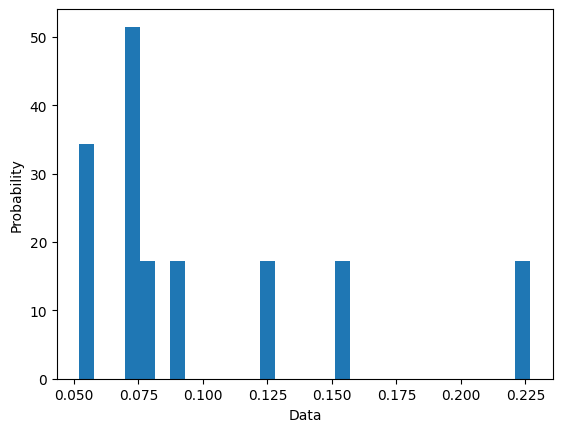

In [24]:
plt.hist(confidences, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

In [25]:
import mysql.connector

In [26]:
from getpass import getpass

In [29]:
password = getpass()

In [30]:
db = mysql.connector.connect(
            host='localhost',
            user='root',
            password=password,
            database='rasa')

In [31]:
cursor = db.cursor()

In [32]:
cursor.execute("SELECT intent_name, data FROM events WHERE type_name = 'user'")

In [33]:
events = [item for item in list(cursor)]

In [34]:
intents = [event[0] for event in events]

In [35]:
datas = [event[1] for event in events]

In [36]:
all_confidence = []

for i in range(le):
    json_acceptable_string = datas[i].replace("'", "\"")
    dictionary = json.loads(json_acceptable_string)
    all_confidence.append(dictionary['parse_data']['intent']['confidence'])

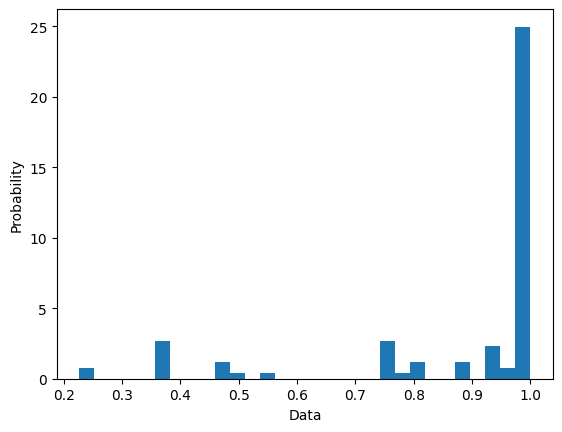

In [37]:
plt.hist(all_confidence, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

In [38]:
dictionary['parse_data']['entities'][0]['confidence_entity']

0.9952464699745178

In [39]:
dictionary['parse_data']['intent']['confidence']

0.22688619792461395

In [40]:
dictionary['parse_data']['entities']

[{'entity': 'lab',
  'start': 0,
  'end': 2,
  'confidence_entity': 0.9952464699745178,
  'value': 'haptoglobin',
  'extractor': 'DIETClassifier',
  'processors': ['EntitySynonymMapper']}]

In [43]:
entity_confidences = []

for i in range(le):
    json_acceptable_string = datas[i].replace("'", "\"")
    dictionary = json.loads(json_acceptable_string)

    for entity in dictionary['parse_data']['entities']:
        if len(entity) != 0 and 'confidence_entity' in entity.keys():
            entity_confidences.append(entity['confidence_entity'])

In [44]:
dictionary['parse_data']['entities']

[]

In [42]:
entity

{'entity': 'drug',
 'start': 38,
 'end': 51,
 'value': 'Acetaminophen',
 'extractor': 'RegexEntityExtractor'}